<a href="https://colab.research.google.com/github/OctavioGMoran/Proyecto_MNA_Equipo1/blob/main/Avance1.1Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_ _ _
### **Equipo 1**

**Diana Valeria García Briones - A01793006**

**Octavio Alberto García Morán - A01213977**

**Ivan Lee Cancino - A01793491**



**Importacion de librerias**

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import pandas as pd
from tqdm import tqdm
%matplotlib inline
import requests

**Conectarse al Conjunto de Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/drive/MyDrive/ProyectoIntegrador/BD.xlsx"
Datos = pd.read_excel(url,sheet_name="ACTUAL CON FORMULAS")

# Ahora puedes usar Datos como un DataFrame de Pandas
Datos.head()


,Código,CI,Edad,Año,Línea,MA,SON,ES,PD,CRI,...,TBM,IEI,MPC,AHG,TMM,MDO,DIG,DVS,RBF,TOTAL BECK
0,1,1,21,5,2,1,0,0,0,1,...,0,0,0,0,2,0,0,0,0,10
1,2,1,25,5,2,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,10
2,3,1,19,1,1,3,4,4,4,4,...,1,3,0,1,1,2,3,1,2,41
3,4,1,18,1,1,2,2,2,2,1,...,0,0,1,1,2,0,0,0,0,9
4,5,1,19,2,1,1,0,2,2,1,...,3,2,1,0,0,0,2,0,0,26


### **¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

No, no existen valores nulos en nuestro conjunto de datos y esto ocurre debido a la forma en que se recolectaron los datos pues al ser todos indispensables no podian quedarse preguntars sin contestar en el cuestionario aplicado a los estudiantes.

In [ ]:
# Buscar valores nulos en el conjunto de datos
valores_nulos = Datos.isnull().sum()

# Mostrar el recuento de valores nulos por columna
print(valores_nulos)

Código         0
CI             0
Edad           0
Año            0
Línea          0
MA             0
SON            0
ES             0
PD             0
CRI            0
VR             0
TR             0
EF             0
ECA            0
HD             0
HP             0
EC             0
PC             0
GM             0
MM             0
PA             0
TS             0
TOTAL SPIN     0
NP             0
P              0
PD.1           0
DR             0
I              0
IR             0
MT             0
TOTAL GAD-7    0
TPE            0
ACO            0
TBP            0
IDR            0
TMR            0
MR             0
CFA            0
INT            0
ATZ            0
NRV            0
BLQ            0
TBM            0
IEI            0
MPC            0
AHG            0
TMM            0
MDO            0
DIG            0
DVS            0
RBF            0
TOTAL BECK     0
dtype: int64


### **¿Cuáles son las estadísticas resumidas del conjunto de datos?**

A continuacion de hara un analisis estadistico de las variables, sin embargo, antes de continuar debemos excluir las variables descriptivas previamente predefinidas como lo son Codigo, CI, Año y Edad.

Posteriomnete evaluaremos si las variables totales como 'TOTAL SPIN','TOTAL GAD-7','TOTAL BECK' deberan tambien ser excluidas de los analisis o usarse como referencias.

In [ ]:
columnas_a_excluir = ['Código', 'CI', 'Año','Edad','Línea']

# Crear una copia de los datos excluyendo las columnas
DatosL = Datos.drop(columnas_a_excluir, axis=1)

In [ ]:
# Obtener estadísticas resumidas
resumen_estadistico = DatosL.describe()

# Mostrar el resumen estadístico
print(resumen_estadistico)

               MA         SON          ES          PD         CRI          VR  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     1.404558    1.470085    1.535613    1.749288    2.356125    2.082621   
std      1.014963    1.282226    1.189604    1.230490    1.285618    1.265593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
50%      1.000000    1.000000    1.000000    2.000000    2.000000    2.000000   
75%      2.000000    2.000000    2.000000    3.000000    3.000000    3.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

               TR          EF         ECA          HD  ...         TBM  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     1.908832    1.518519    1.834758    1.441595  ...    0.752137   
std      1.347042    1.328404    1.361109    1.1

En el resumen anterior podemos ver el conteo, media, desviacion estandar, valor minimo y valor maximo de cada columna en el conjunto de datos.

### **¿Hay valores atípicos en el conjunto de datos?**

Para encontrar los valores atipicos utilizaremos el rango intercuartílico (IQR) para medir la dispersión de un conjunto de datos y posteriormente con el uso diagramas de cajas (Box Plot) por columna.

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = DatosL.quantile(0.25)
Q3 = DatosL.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
valores_atipicos = ((DatosL < (Q1 - 1.5 * IQR)) | (DatosL > (Q3 + 1.5 * IQR)))

# Mostrar los valores atípicos
print(valores_atipicos.sum())


MA             10
SON             0
ES             20
PD              0
CRI             0
VR              0
TR              0
EF              0
ECA             0
HD             18
HP              0
EC              0
PC              0
GM              0
MM              0
PA              0
TS              0
TOTAL SPIN      0
NP              0
P               0
PD.1            0
DR              0
I               0
IR              0
MT              0
TOTAL GAD-7     0
TPE             0
ACO             0
TBP             0
IDR             0
TMR             0
MR              0
CFA             0
INT             0
ATZ             0
NRV             0
BLQ             0
TBM            29
IEI             0
MPC             0
AHG            26
TMM            24
MDO             0
DIG             0
DVS            45
RBF            10
TOTAL BECK      0
dtype: int64


Podemos observar que para aquellas columnas que tienen una dispersion se encuentre entre los valores de 20-30 puntos aproximadamente, teniendo unicamente la columna de DVS con un mayor rango en 45.

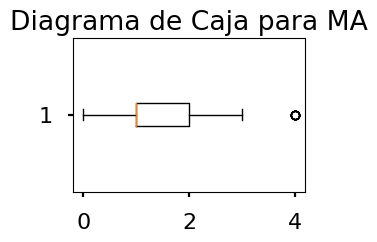

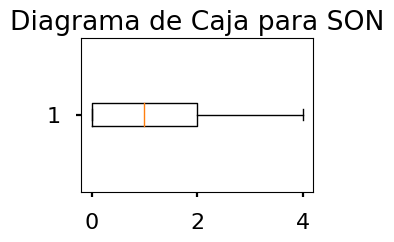

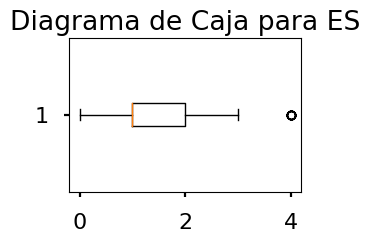

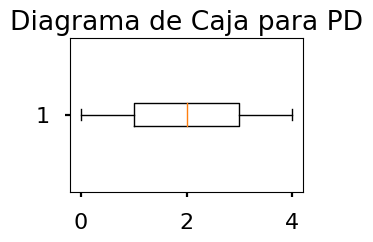

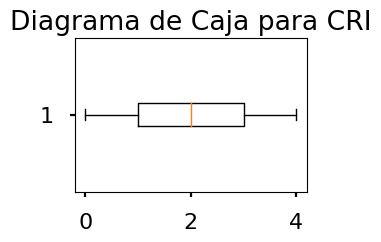

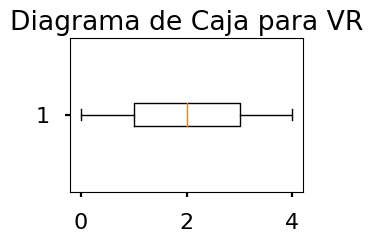

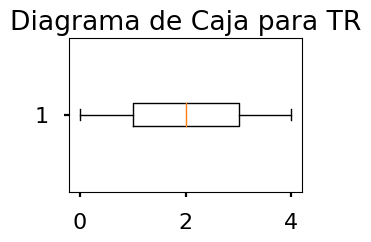

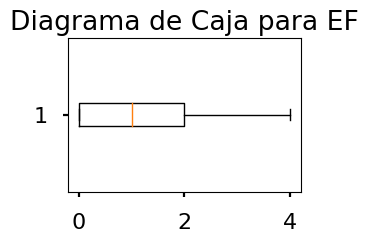

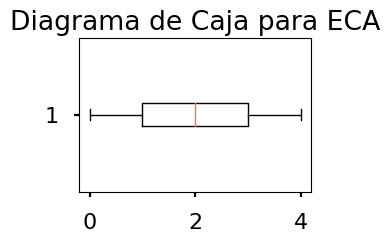

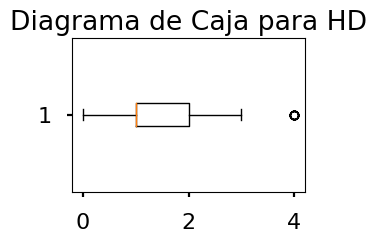

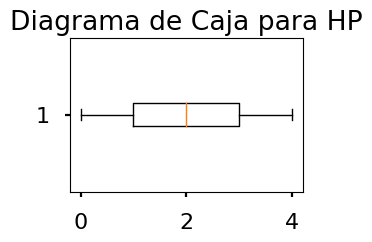

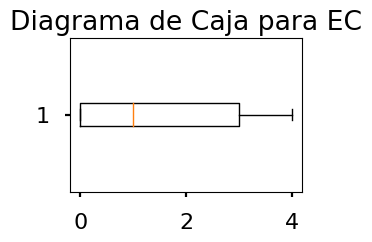

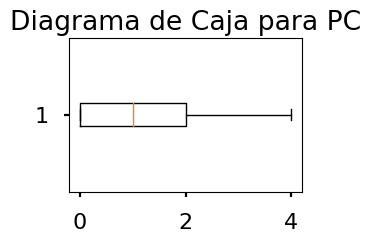

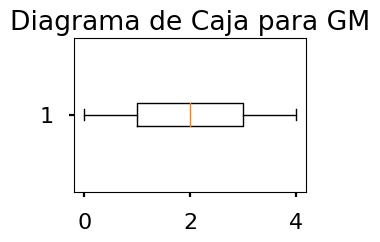

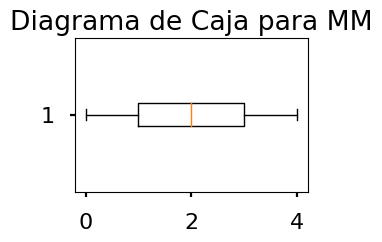

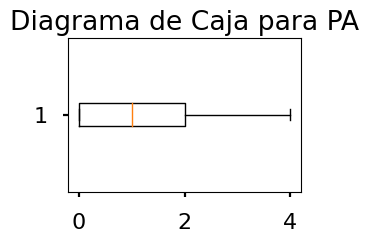

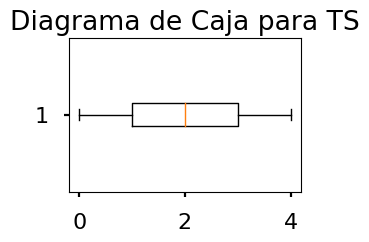

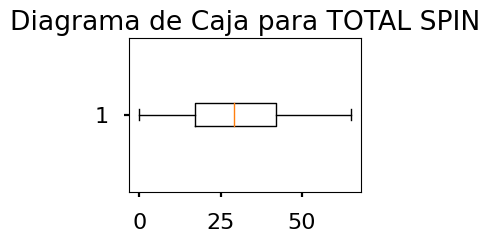

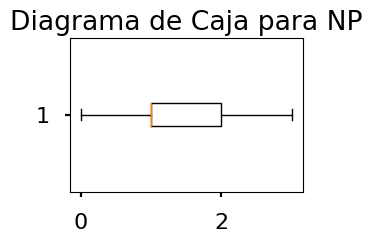

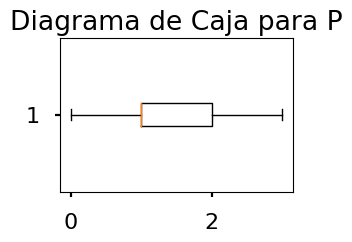

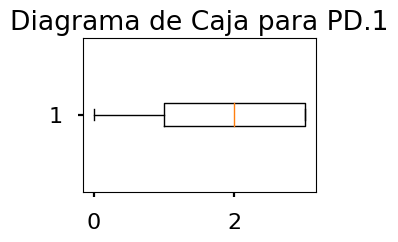

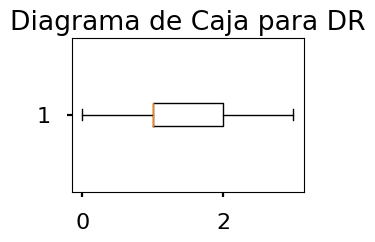

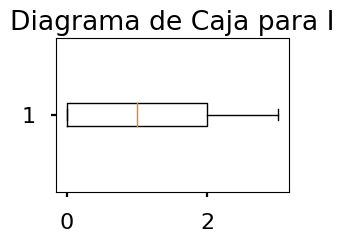

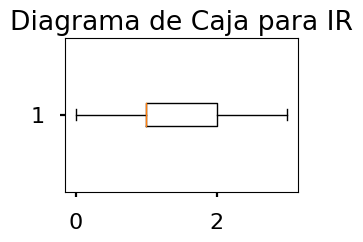

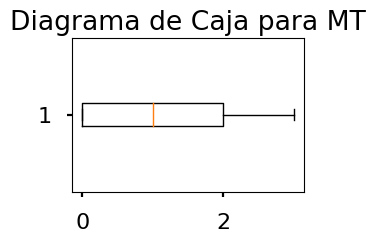

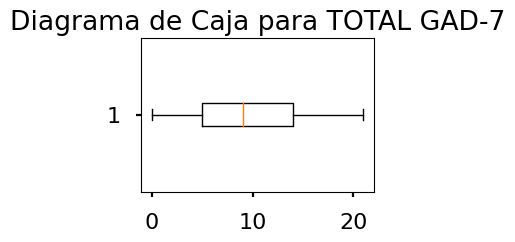

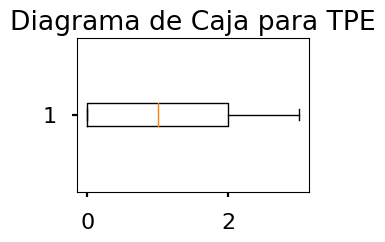

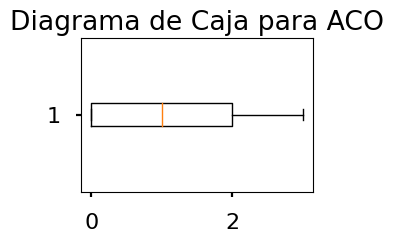

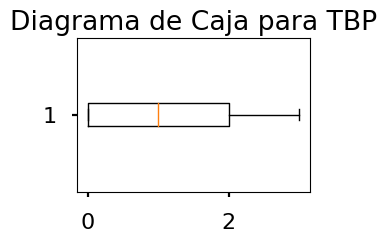

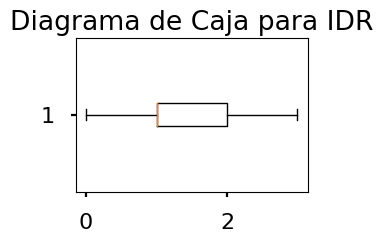

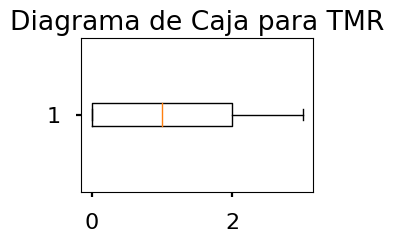

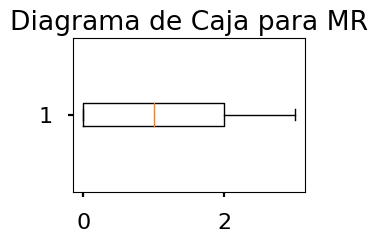

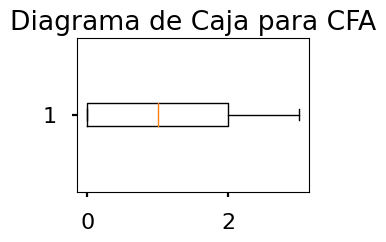

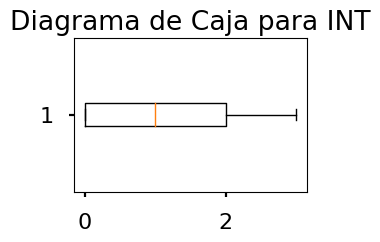

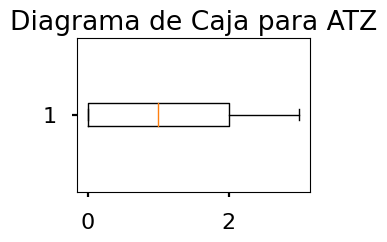

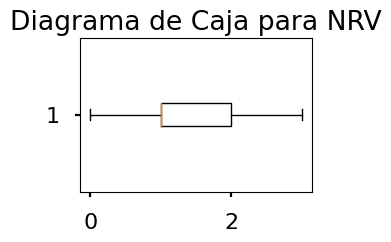

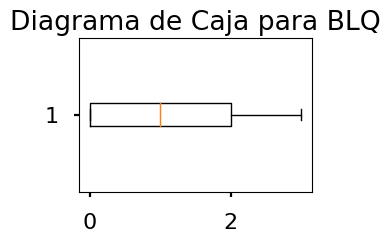

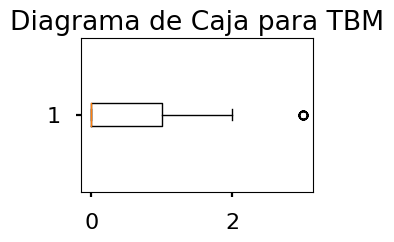

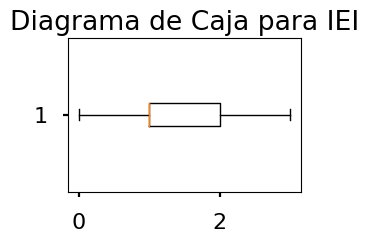

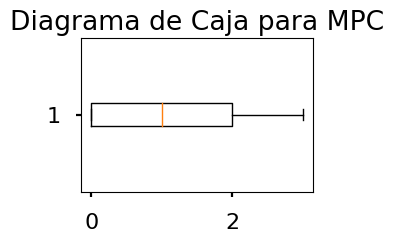

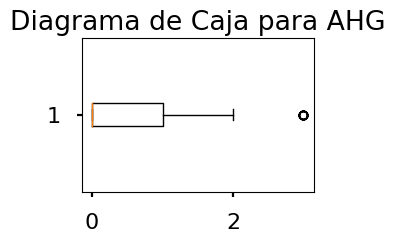

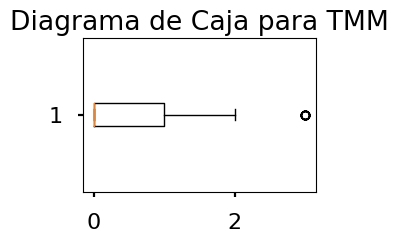

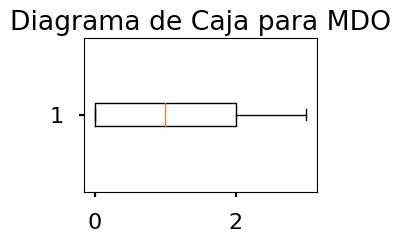

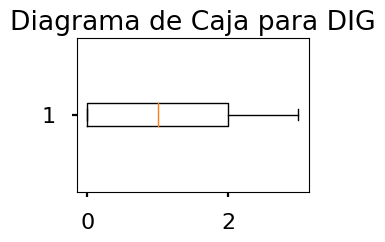

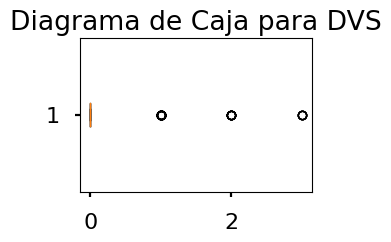

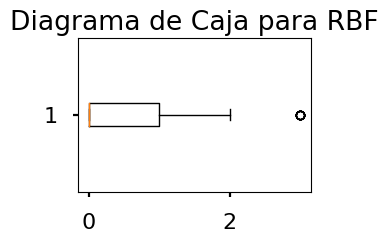

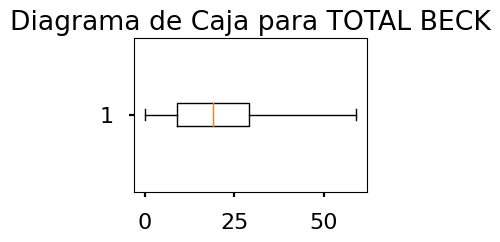

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
columnas_numericas = DatosL.select_dtypes(include='number')

# Crear un gráfico de caja para cada columna
for columna in columnas_numericas.columns:
    plt.figure(figsize=(3, 2))
    plt.boxplot(columnas_numericas[columna], vert=False)
    plt.title(f'Diagrama de Caja para {columna}')
    plt.show()

Tal como se muestraba en nuestro analisis de IQR la variable con mayor cantidad de datos atipicos es DVS, con el siguiente diagrama de caja: 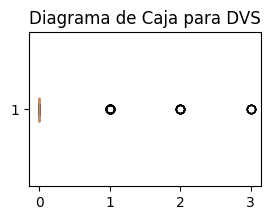


#### **¿Cuál es la cardinalidad de las variables categóricas?**

Para este estudio solamente tenemos 3 variables categoricas que son nuestras variables demograficas descriptivas las cuales corresponden a:

1. Edad: Edad del paciente.
2. Año: Año universitario que se encuentra cursando el estudiante.       
3. Línea: Indica si el estudiante curso la preparatoria en linea o no.

Estas 3 variables son de tipo numerico, mientras en el conjunto tambien se encuentran las siguientes variables categoricas adicionales de tipo numerico:

1. Código: Identificador unico del paciente.     
2. CI: Concentimiento inicial de la prueba.       

### **¿Existen distribuciones sesgadas en el conjunto de datos? ¿Necesitamos aplicar alguna transformación no lineal?**

No se presume la existencia de sesgo en los datos, dado que las encuestas fueron diligenciadas por los propios estudiantes de manera anónima y sin evidencia de presión aparente. Además, es importante destacar que los participantes se ofrecieron voluntariamente, garantizando así que la realización de la prueba no se llevó a cabo en contra de su voluntad.

### **¿Hay correlación entre las variables dependientes e independientes?**

Debido a la complejidad de la gran cantidad de variables involucradas, hemos decidido utilizar una matriz de correlación representada visualmente como un mapa de calor. En este mapa, las tonalidades de azul indican una correlación más baja entre las variables, mientras que las tonalidades en color rojo sugieren una relación más fuerte.

In [ ]:
import seaborn as sns
plt.style.use('seaborn-poster')

# Calcular la matriz de correlación
matriz_correlacion = DatosL.corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)


                   MA       SON        ES        PD       CRI        VR  \
MA           1.000000  0.299121  0.361917  0.319369  0.456384  0.434328   
SON          0.299121  1.000000  0.347696  0.346543  0.407723  0.426725   
ES           0.361917  0.347696  1.000000  0.540930  0.502630  0.547434   
PD           0.319369  0.346543  0.540930  1.000000  0.450331  0.541726   
CRI          0.456384  0.407723  0.502630  0.450331  1.000000  0.624563   
VR           0.434328  0.426725  0.547434  0.541726  0.624563  1.000000   
TR           0.296636  0.375573  0.376460  0.360223  0.423010  0.406655   
EF           0.269911  0.269130  0.772956  0.525479  0.390114  0.419701   
ECA          0.333938  0.396611  0.577127  0.555209  0.422327  0.545339   
HD           0.372958  0.412395  0.570802  0.744250  0.537432  0.626700   
HP           0.400456  0.383640  0.527800  0.509488  0.488089  0.572383   
EC           0.349554  0.384733  0.408802  0.314025  0.701142  0.483126   
PC           0.321582  0.

<ipython-input-36-e0c9243eaa7e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


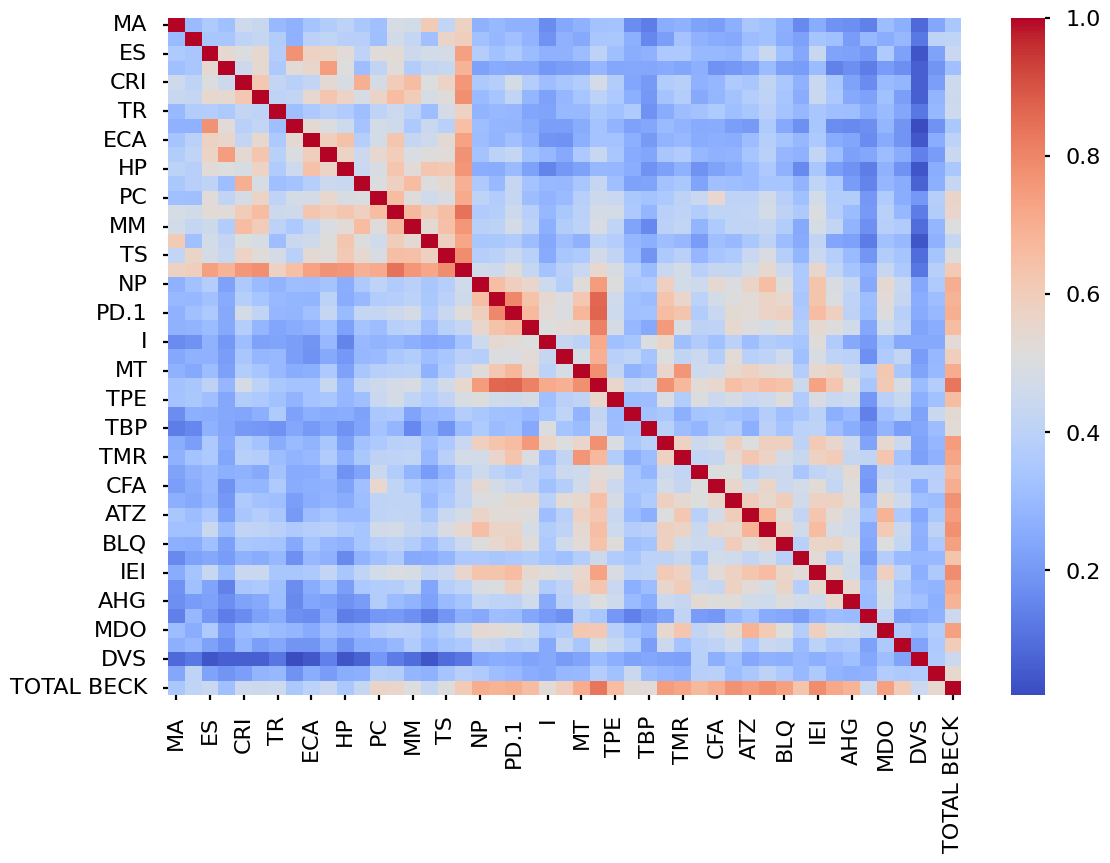

In [ ]:
# Crear un mapa de calor
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()


Según el mapa resultante, la correlación más notable entre dos variables es de 0.7, equivalente al 70% de relación entre ellas. Algunas de estas variables incluyen:

1. EF - ES con una correlacion de 0.77
2. HD - PD con una correlacion de 0.74
3. EC - CRI con una correlacion de 0.70


### **¿Cómo se distribuyen los datos en función de diferentes categorías?**
A continuación haremos uso de graficos para visualizar la distribucion de datos con forme a la principal variable "En Linea" donde el 1 indica que el estudiante curso la preparatoria en linea y 2 lo contrario.

In [ ]:
# Filtra los datos por grupo
grupo1 = Datos[Datos['Línea'] == 1]
grupo2 = Datos[Datos['Línea'] == 2]

edad = Datos['Edad']
grado = Datos['Año']
online = Datos['Línea']

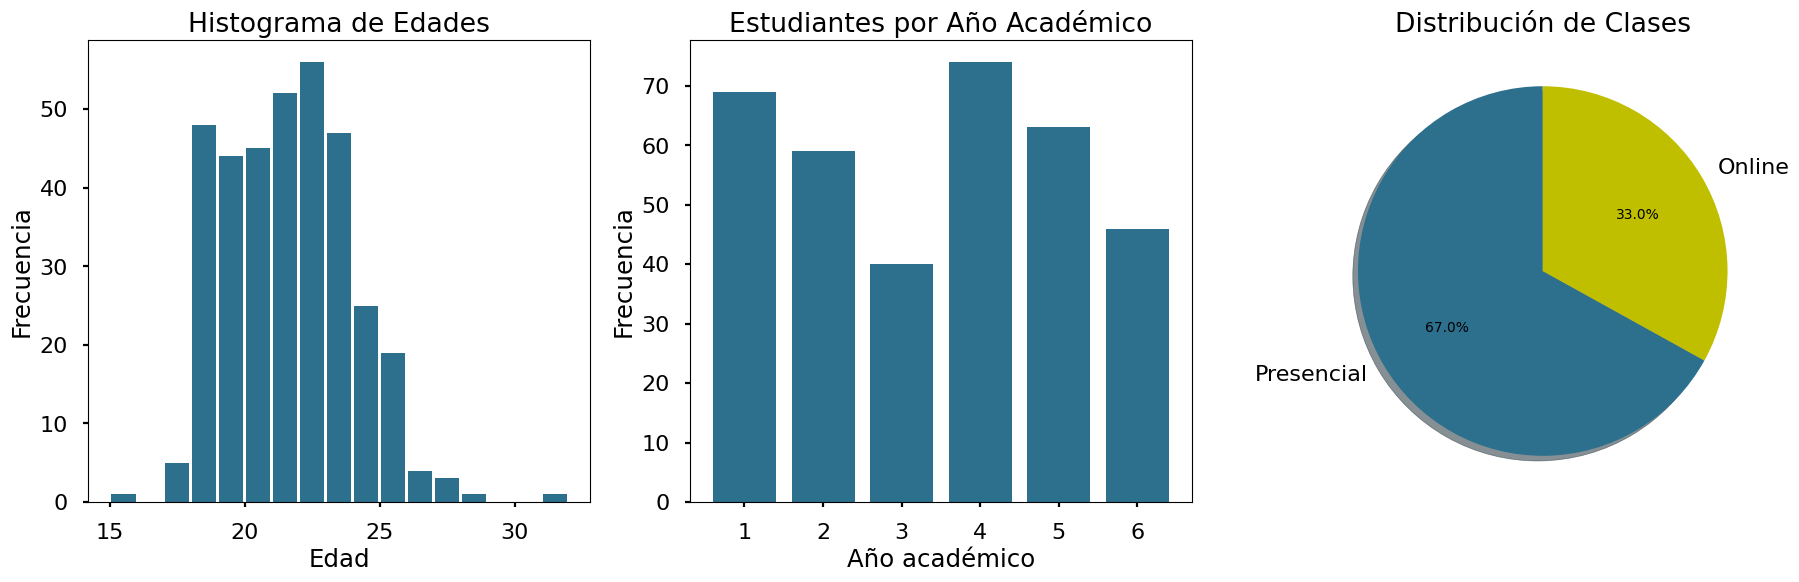

In [ ]:
fig = plt.figure(figsize=(22, 6))

ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Histograma de Edades')
ax1.set_xlabel('Edad')
ax1.set_ylabel('Frecuencia')
ax1.hist(edad, bins=17, rwidth=0.9,
         color='#2D708EFF'
         )

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Estudiantes por Año Académico')
ax2.set_xlabel('Año académico')
ax2.set_ylabel('Frecuencia')
ax2.bar(grado.value_counts().sort_index().index,
        grado.value_counts().sort_index().values,
        color='#2D708EFF'
        )

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Distribución de Clases')
ax3.pie(online.value_counts(),
        labels=['Presencial', 'Online'],
        autopct='%1.1f%%', startangle=90,
        colors=['#2D708EFF', 'y'], shadow=True
        )

plt.show()

In [ ]:
# Obtiene el número de registros en el grupo 1
num_registros_grupo1 = grupo1.shape[0]
num_registros_grupo2 = grupo2.shape[0]

# Imprime el resultado
print(f"El número de registros en el grupo 1 es: {num_registros_grupo1}")
print(f"El número de registros en el grupo 2 es: {num_registros_grupo2}")

El número de registros en el grupo 1 es: 116
El número de registros en el grupo 2 es: 235


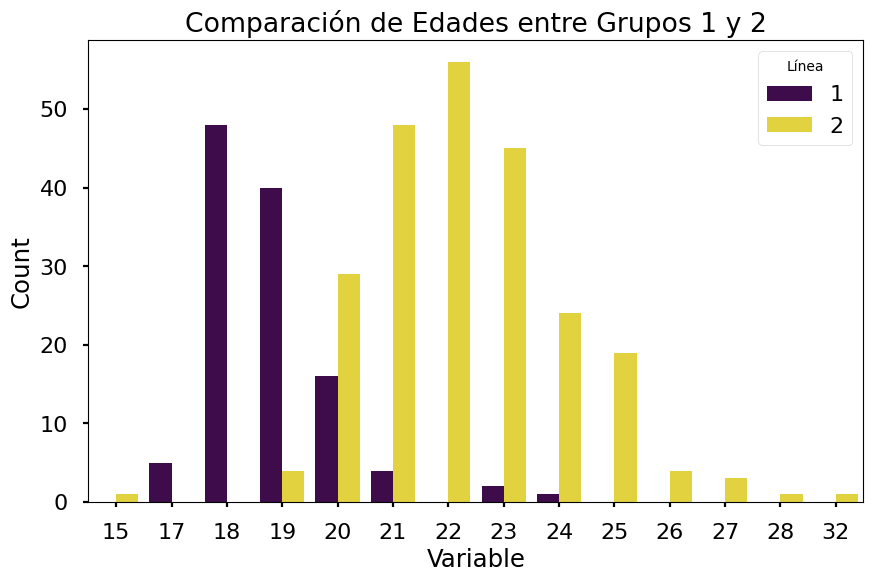

In [ ]:
#Comparación de grupos de Edades
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de barras para la variable 'Variable' en ambos grupos
sns.countplot(x='Edad', hue='Línea', data=Datos, palette='viridis')
plt.title('Comparación de Edades entre Grupos 1 y 2')
plt.xlabel('Variable')
plt.ylabel('Count')

plt.show()

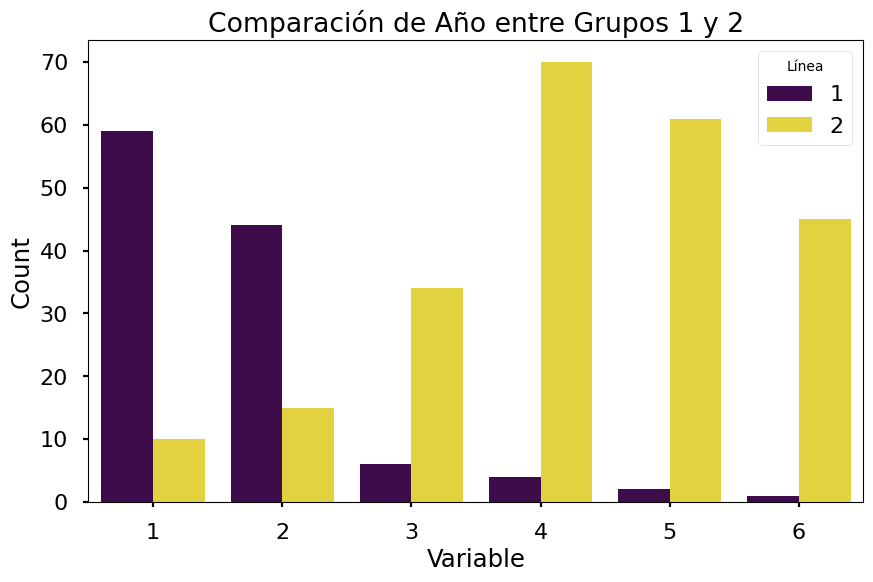

In [ ]:
#Comparación de grupos de Años
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de barras para la variable 'Variable' en ambos grupos
sns.countplot(x='Año', hue='Línea', data=Datos, palette='viridis')
plt.title('Comparación de Año entre Grupos 1 y 2')
plt.xlabel('Variable')
plt.ylabel('Count')

plt.show()

### **¿Hay desequilibrio en las clases de la variable objetivo?**

Si existe una diferencia entre ambos grupos de clases, podemos notar que la clase 2 tiene al menos el doble de registros que el primer grupo, por lo que será necesario hacer un balanceo para evitar crear un análisis sesgado.

Otra de las problemáticas que observamos es que los estudiantes más jóvenes y, por lo tanto, se encuentran en los primeros años de la carrera, son quienes mayoritariamente cursaron la preparatoria en línea. Por lo tanto, a partir de la edad de 25, no encontramos estudiantes que hayan pasado por dicha modalidad.